In [16]:
conda install filterpy

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - filterpy

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read train.csv
df=pd.read_csv('data/train.csv')
dftest=pd.read_csv('data/test.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [6]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
df['Embarked']=df['Embarked'].fillna('S')

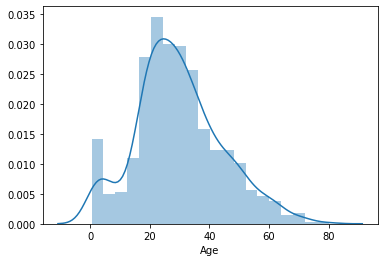

In [8]:
sns.distplot(df[df['Age'].notnull()]['Age'])

In [9]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
df['Age']=df['Age'].interpolate()

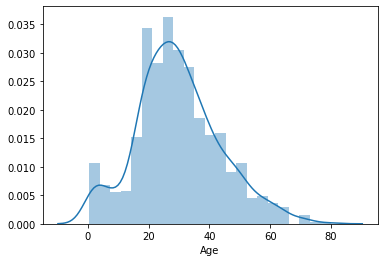

In [11]:
sns.distplot(df[df['Age'].notnull()]['Age'])

In [12]:
len(df['Cabin'].drop_duplicates())

148

In [13]:
df=df.drop('Cabin',axis=1)

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
df=df.drop(['PassengerId','Name','Ticket'],axis=1)
df.head()
            

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


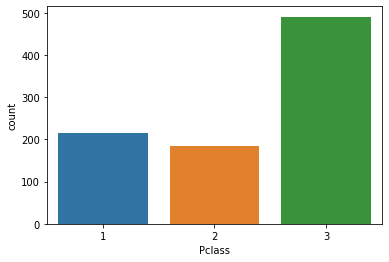

In [16]:
sns.countplot(x='Pclass',data=df)

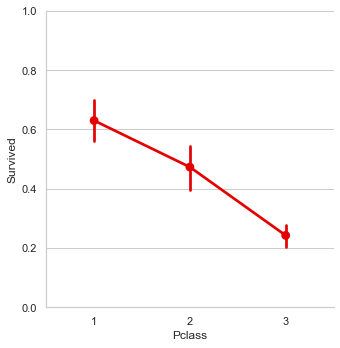

In [17]:
sns.set(style="whitegrid")
g = sns.PairGrid(data=df, x_vars=['Pclass'], y_vars='Survived', size=5)
g.map(sns.pointplot, color=sns.xkcd_rgb["red"])
g.set(ylim=(0, 1))

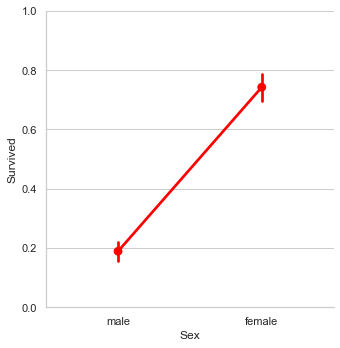

In [18]:
h = sns.PairGrid(data=df, x_vars=['Sex'], y_vars='Survived', size=5)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

In [19]:
df['is_child']=df['Age'].apply(lambda x: 1 if x<=15 else 0)

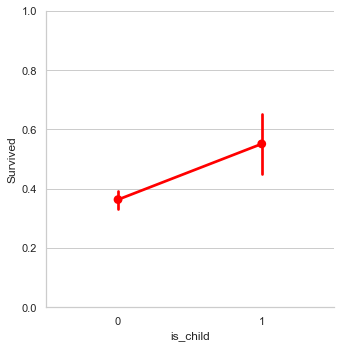

In [20]:
h = sns.PairGrid(data=df, x_vars=['is_child'], y_vars='Survived', size=5)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

In [21]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_child
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,0


In [22]:
df['family']=df['SibSp']+df['Parch']
df=df.drop(['SibSp','Parch'], axis=1)

In [23]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,is_child,family
0,0,3,male,22.0,7.2500,S,0,1
1,1,1,female,38.0,71.2833,C,0,1
2,1,3,female,26.0,7.9250,S,0,0
3,1,1,female,35.0,53.1000,S,0,1
4,0,3,male,35.0,8.0500,S,0,0


In [24]:
df['is_alone']=df['family'].apply(lambda x: 1 if x==0 else 0)

In [25]:
df['is_female']=df['Sex'].apply(lambda x: 1 if x=='female' else 0)
df=df.drop('Sex',axis=1)
df.head()

,Survived,Pclass,Age,Fare,Embarked,is_child,family,is_alone,is_female
0,0,3,22.0,7.2500,S,0,1,0,0
1,1,1,38.0,71.2833,C,0,1,0,1
2,1,3,26.0,7.9250,S,0,0,1,1
3,1,1,35.0,53.1000,S,0,1,0,1
4,0,3,35.0,8.0500,S,0,0,1,0


In [26]:
df=pd.get_dummies(df,prefix=['is'])
df.head()

,Survived,Pclass,Age,Fare,is_child,family,is_alone,is_female,is_C,is_Q,is_S
0,0,3,22.0,7.2500,0,1,0,0,0,0,1
1,1,1,38.0,71.2833,0,1,0,1,1,0,0
2,1,3,26.0,7.9250,0,0,1,1,0,0,1
3,1,1,35.0,53.1000,0,1,0,1,0,0,1
4,0,3,35.0,8.0500,0,0,1,0,0,0,1


In [27]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [28]:
X,y=df.drop(['Survived'],axis=1),df['Survived']

In [29]:
train_X, val_X, train_y, val_y=train_test_split(X,y, train_size=0.8)

In [30]:
X.shape

(891, 10)

In [31]:
train_X

,Pclass,Age,Fare,is_child,family,is_alone,is_female,is_C,is_Q,is_S
741,1,36.00,78.8500,0,1,0,0,0,0,1
121,3,26.75,8.0500,0,0,1,0,0,0,1
722,2,34.00,13.0000,0,0,1,0,0,0,1
451,3,33.00,19.9667,0,1,0,0,0,0,1
555,1,62.00,26.5500,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
562,2,28.00,13.5000,0,0,1,0,0,0,1
830,3,15.00,14.4542,1,1,0,1,1,0,0
29,3,33.00,7.8958,0,0,1,0,0,0,1
45,3,18.80,8.0500,0,0,1,0,0,0,1


In [54]:
val_X

,Pclass,Age,Fare,is_child,family,is_alone,is_female,is_C,is_Q,is_S
402,3,21.0,9.8250,0,1,0,1,0,0,1
52,1,49.0,76.7292,0,1,0,1,1,0,0
272,2,41.0,19.5000,0,1,0,1,0,0,1
624,3,21.0,16.1000,0,0,1,0,0,0,1
687,3,19.0,10.1708,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
364,3,32.5,15.5000,0,1,0,0,0,1,0
258,1,35.0,512.3292,0,0,1,1,1,0,0
443,2,28.0,13.0000,0,0,1,1,0,0,1
500,3,17.0,8.6625,0,0,1,0,0,0,1


In [51]:
val_y.shape

(179,)

In [57]:
def pfa_first_classifier(model):
    classifier = model()
    classifier.fit(train_X, train_y)
    print(classifier.score(val_X, val_y),'ee')
    return classifier

In [62]:
here_we_go = pfa_first_classifier(RandomForestClassifier)
here_we_go.score(val_X, val_y)


0.8100558659217877 ee


0.8100558659217877

In [64]:
clf = RandomForestClassifier()
clf.fit(train_X, train_y)
y_preds = clf.predict(val_X)
acc_rf = round(clf.score(val_X, val_y) * 100, 2)
print (str(acc_rf) + ' percent')
clf.score(val_X, val_y)

83.8 percent


0.8379888268156425

In [65]:
importances=clf.feature_importances_

Feature ranking:
1. feature 1 (0.281101)
2. feature 2 (0.251347)
3. feature 6 (0.242329)
4. feature 0 (0.070522)
5. feature 4 (0.067372)
6. feature 5 (0.024834)
7. feature 3 (0.020705)
8. feature 7 (0.016805)
9. feature 8 (0.012745)
10. feature 9 (0.012239)


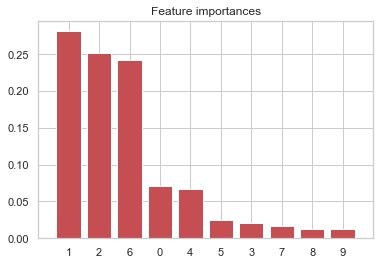

In [66]:
std = np.std([clf.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

1. feature 1 (0.285220)
2. feature 6 (0.267219)
3. feature 2 (0.257694)
4. feature 0 (0.067978)
5. feature 4 (0.060645)
6. feature 5 (0.016154)
7. feature 9 (0.014701)
8. feature 3 (0.012111)
9. feature 7 (0.010694)
10. feature 8 (0.007583)


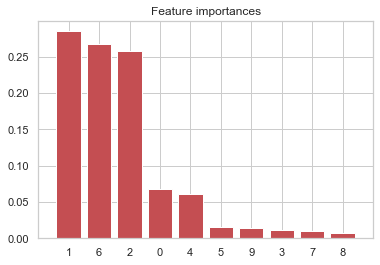

In [45]:
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [51]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Decent'],
    
    'Score': [acc_log_reg, acc_linear_svc, 
              acc_knn,  acc_decision_tree, acc_random_forest, acc_gnb, 
              acc_perceptron, acc_sgd]
    })

models.sort_values(by='Score', ascending=False)

NameError: name 'acc_linear_svc' is not defined

In [52]:
dftest

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
test=pd.read_csv('data/test.csv')
predict= = pd.DataFrame({"Passenger ID"}:test["Passenger ID"],"Survived":y_preds})
predict.to_csv('my_predictions_for_the_testset.csv', index=False)